In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.manifold import TSNE


In [27]:
# The datasets are already preprocessed...
dataset1 = pickle.load(open("../datasets/part2_dataset_1.data", "rb"))
dataset2 = pickle.load(open("../datasets/part2_dataset_2.data", "rb"))


In [19]:
tsne = TSNE(n_components=2, perplexity=50.0, early_exaggeration=12.0, learning_rate=500.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)

# Fit and transform the data
dataset1_tsne = tsne.fit_transform(dataset1)
dataset2_tsne = tsne.fit_transform(dataset2)

/Users/berk/dev/ml-hw2/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/berk/dev/ml-hw2/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


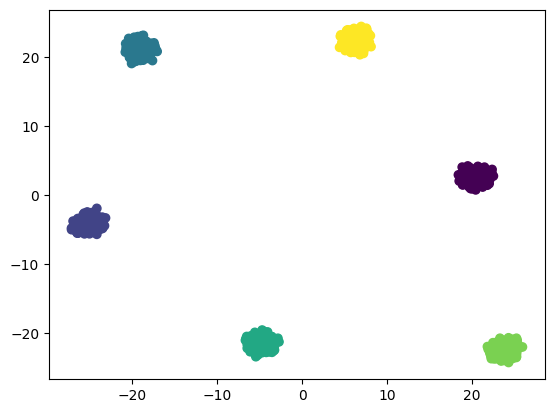

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6).fit(dataset1_tsne)



# Plot the data
plt.figure()
plt.scatter(dataset1_tsne[:, 0], dataset1_tsne[:, 1], c=kmeans.labels_, label='Dataset 1')




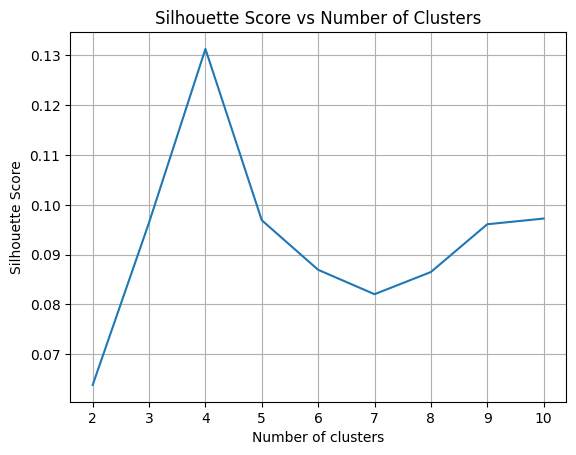

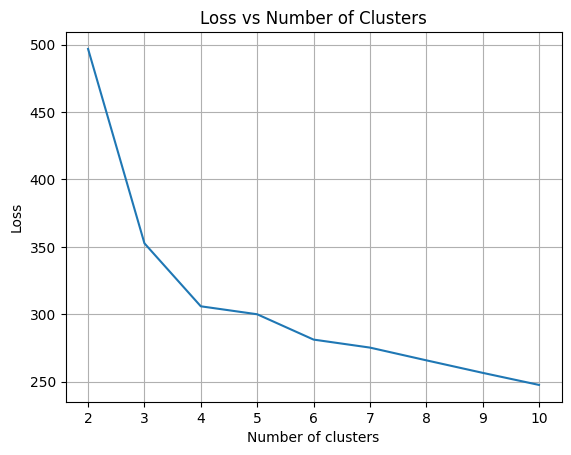

In [46]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

k_vals = range(2, 11)
silhouette_scores = []
losses = []

for k in k_vals:
    km = KMedoids(n_clusters=k, metric='cosine').fit(dataset2)
    silhouette_scores.append(silhouette_score(dataset2, km.labels_))
    losses.append(km.inertia_)

plt.figure()
plt.plot(k_vals, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(k_vals, losses)
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.title('Loss vs Number of Clusters')
plt.grid(True)
plt.show()


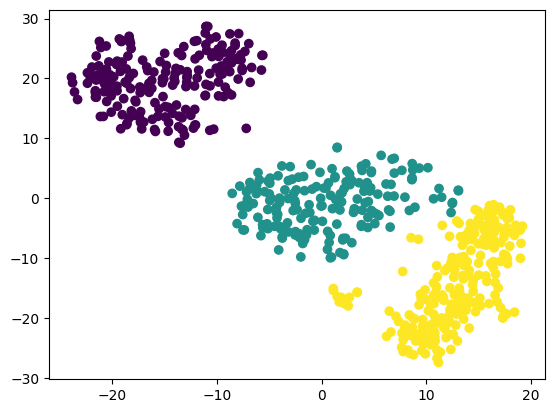

In [47]:

kmedoids = KMedoids(n_clusters=3).fit(dataset2_tsne)
# add cluster based color to visulaziation of dataset 2
plt.scatter(dataset2_tsne[:, 0], dataset2_tsne[:, 1], c=kmedoids.labels_)
# plt.scatter(dataset2_tsne[:, 0], dataset2_tsne[:, 1], cmap='turbo' , label='Dataset 2')

plt.show()




In [49]:
# show images and their cluster
for i in range(3):
    plt.figure()
    cluster = dataset2[kmedoids.labels_ == i]
    for j in range(50):
        plt.subplot(1, 50, j+1)
        plt.imshow(cluster[j].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()